In [ ]:
!pip install lightning-bolts

In [ ]:
!pip install pytorch-lightning

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!pip install torchmetrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [15]:
!gdown --id 1P-v4kMVqxIXs1CYjEkQgiYGw24L06HXp -O local_dataset_utilities.py

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1P-v4kMVqxIXs1CYjEkQgiYGw24L06HXp
From (redirected): https://drive.google.com/uc?id=1P-v4kMVqxIXs1CYjEkQgiYGw24L06HXp&confirm=t&uuid=72dd9642-8f3f-4ff3-aa47-3ed6ef4bcec8
To: /content/local_dataset_utilities.py
100% 2.98k/2.98k [00:00<00:00, 10.5MB/s]


In [53]:
!gdown --id 1invn8q15DgSSjzVW4RlfPiyCqUTeqdfq -O local_utilities.py

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1invn8q15DgSSjzVW4RlfPiyCqUTeqdfq
From (redirected): https://drive.google.com/uc?id=1invn8q15DgSSjzVW4RlfPiyCqUTeqdfq&confirm=t&uuid=48bc7e55-6ded-4ffb-a495-2634e59a8dd8
To: /content/local_utilities.py
100% 2.46k/2.46k [00:00<00:00, 7.13MB/s]


In [54]:
import os.path as op

import pytorch_lightning as L
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd
import torch

from sklearn.feature_extraction.text import CountVectorizer

from local_dataset_utilities import download_dataset, load_dataset_into_to_dataframe, partition_dataset
from local_dataset_utilities import IMDBDataset

from local_utilities import LightningModel

**Load dataset into dataframe**

In [17]:
download_dataset()

100% | 80.23 MB | 3.97 MB/s | 20.23 sec elapsed

In [18]:
df = load_dataset_into_to_dataframe()

df.head()

100%|██████████| 50000/50000 [01:39<00:00, 503.40it/s]


Class distribution: [25000 25000]


,text,label
0,I went and saw this movie last night after bei...,1
0,Actor turned director Bill Paxton follows up h...,1
0,As a recreational golfer with some knowledge o...,1
0,"I saw this film in a sneak preview, and it is ...",1
0,Bill Paxton has taken the true story of the 19...,1


In [19]:
partition_dataset(df)

In [20]:
df_train = pd.read_csv('train.csv')
df_train.tail()

,index,text,label
34995,0,Frank Capra's creativity must have been just a...,0
34996,0,Just saw the film tonight in a preview and it'...,0
34997,0,"If you love Japanese monster movies, you'll lo...",1
34998,0,Because it came from HBO and based on the IMDb...,0
34999,0,"WARNING!!! SOME POSSIBLE PLOT SPOILERS, AS IF ...",0


In [21]:
np.bincount(df_train['label'])

array([17452, 17548])

In [22]:
df_val = pd.read_csv('val.csv')
df_val.tail()

,index,text,label
4995,0,The Matador is a strange film. Its main charac...,1
4996,0,Not bad performances. Whoopi plays the wise/wa...,0
4997,0,I was surprised when I saw this film. I'd hear...,0
4998,0,When great director/actor combinations are tal...,0
4999,0,This show is non Stop hilarity. the first joke...,1


In [25]:
np.bincount(df_val['label'])

array([2542, 2458])

In [26]:
df_test = pd.read_csv('test.csv')
df_test.tail()

,index,text,label
9995,0,Every generation fully believes it is living i...,0
9996,0,Possibly the most brilliant thing about Che: P...,1
9997,0,I was unsure of this movie before renting and ...,1
9998,0,"Just got out of an advance screening, and wow ...",1
9999,0,I sense out there a mix of confusion and varyi...,1


In [27]:
np.bincount(df_test['label'])

array([5006, 4994])

**Bag-of-word models**

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv = CountVectorizer(lowercase=True, max_features=10000, stop_words='english')
cv.fit(df_train['text'])

CountVectorizer(max_features=10000, stop_words='english')

In [34]:
cv.vocabulary_

{'started': 8515,
 'watching': 9725,
 'series': 7957,
 'cable': 1320,
 'idea': 4488,
 'hate': 4191,
 'character': 1544,
 'hold': 4339,
 'beautifully': 892,
 'developed': 2574,
 'understand': 9375,
 'react': 7196,
 'frustration': 3737,
 'fear': 3439,
 'greed': 4020,
 'temptation': 8974,
 'way': 9736,
 'viewer': 9574,
 'experiencing': 3280,
 'christopher': 1656,
 'learning': 5199,
 'br': 1151,
 'abuse': 188,
 'physically': 6608,
 'emotionally': 3046,
 'just': 4963,
 'read': 7199,
 'newspaper': 6088,
 'women': 9880,
 'tolerate': 9134,
 'behavior': 915,
 'dream': 2831,
 'house': 4418,
 'endless': 3074,
 'supply': 8779,
 'expensive': 3276,
 'things': 9036,
 'sure': 8791,
 'loving': 5426,
 'faithful': 3371,
 'husband': 4465,
 'maybe': 5640,
 'watch': 9719,
 'doesn': 2754,
 'matter': 5630,
 'times': 9104,
 'episode': 3140,
 'missed': 5813,
 'episodes': 3141,
 'sequence': 7950,
 'season': 7869,
 'late': 5151,
 'night': 6101,
 'commercials': 1874,
 'language': 5133,
 'reruns': 7427,
 'movie': 5

In [38]:
X_train = cv.transform(df_train['text'])
X_val = cv.transform(df_val['text'])
X_test = cv.transform(df_test['text'])

In [39]:
X_train.shape

(35000, 10000)

In [40]:
feat_vec = np.array(X_train.todense())[0]
feat_vec

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
feat_vec.shape

(10000,)

In [42]:
np.bincount(feat_vec)

array([9926,   67,    5,    0,    1,    0,    1])

**Define the dataloader**

In [43]:
from torch.utils.data import Dataset, DataLoader


class TextDataset(Dataset):
    def __init__(self, X, y):

        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y, dtype=torch.int64)

    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]
        return x, y

    def __len__(self):
        return self.labels.shape[0]

In [58]:
train_ds = TextDataset(X_train.todense(), df_train["label"].values)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=32,
    shuffle=True,)

In [59]:
val_ds = TextDataset(X_val.todense(), df_val["label"].values)

val_loader = DataLoader(
    dataset=val_ds,
    batch_size=32,
    shuffle=True,
)

In [60]:
test_ds = TextDataset(X_test.todense(), df_test["label"].values)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=32,
    shuffle=True,
)

In [61]:
for batch_idx, (features, class_labels) in enumerate(train_loader):
    break

In [62]:
features.shape

torch.Size([32, 10000])

**Implementing the classifier**

In [63]:
class LogisticRegression(torch.nn.Module):

    def __init__(self, num_features, num_classes):
        super().__init__()
        self.linear = torch.nn.Linear(num_features, num_classes)

    def forward(self, x):
        logits = self.linear(x)
        return logits


pytorch_model = LogisticRegression(num_features=10_000, num_classes=2)

In [64]:
callbacks = [
    ModelCheckpoint(save_top_k=1, mode="max", monitor="val_acc", save_last=True)
]

In [65]:
lightning_model = LightningModel(model=pytorch_model, learning_rate=0.05)

trainer = L.Trainer(
    callbacks=callbacks,
    max_epochs=30,
    accelerator="cpu",
    logger=CSVLogger(save_dir="logs/", name="my-model"),
    deterministic=True,
)

trainer.fit(model=lightning_model, train_dataloaders=train_loader, val_dataloaders=val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | LogisticRegression | 20.0 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
20.0 K    Trainable params
0         Non-trainable params
20.0 K    Total params
0.080     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:488: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


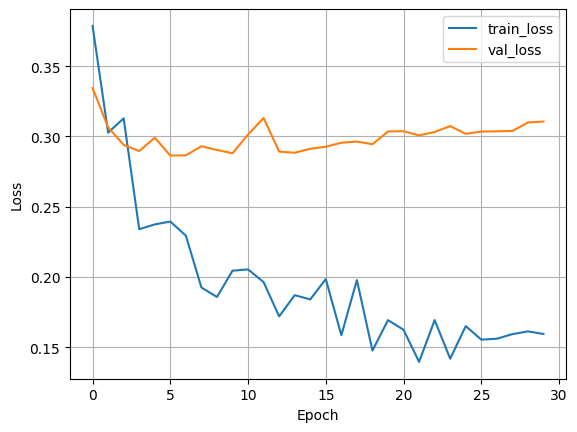

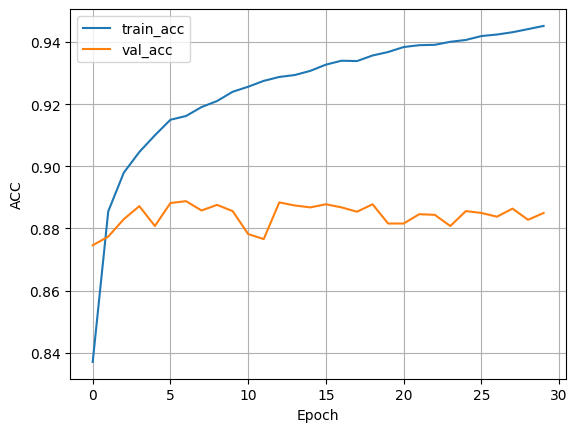

In [66]:
from local_utilities import plot_csv_logger

plot_csv_logger(csv_path=f"{trainer.logger.log_dir}/metrics.csv")

In [67]:
trainer.test(model=lightning_model, dataloaders=test_loader)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:488: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8819000124931335     │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.8819000124931335}]